# Setup

In [140]:
import pandas as pd
import matplotlib.pyplot as plt

# Determine the Temporal Pattern at each rain guage

Each rain guage will experience a different temporal pattern, as the rainfall moves accross the city. We can determine the shape of this pattern by looking at the hourly rainfall recorded by the [GSMaP data](https://sharaku.eorc.jaxa.jp/GSMaP/) provided by Japan Aerospace Exploration Agency (JAXA). This data has been downloaded for each of the rainguages.


In [141]:
skip_header_rows = list(range(1, 6))
satelitte_df = pd.read_csv('./gsmap_rainfall.csv', index_col=0, skiprows=skip_header_rows, header=0)
satelitte_df.index = pd.to_datetime(satelitte_df.index)
satelitte_df.head()

,Um Azimul,Gasyoura,Hamim,Mezaira,Mukhariz,Al Jazeera b.g,Owtaid,Bada Dafas,Madinat Zayed,Bu Humrah,...,Al Qattara,Raknah,Buraimi,Um ghafa,Mezyed,Al Khazna,Al Arad,Al Shuaibah,Hafeet mountain,Barakah 2
name,,,,,,,,,,,,,,,,,,,,,
2024-04-14 00:00:00,0.0000,0.0389,0.0,0.0000,0.0,0.0,0.0,0.0,0.0,0.0568,...,0.0,0.0,0.0164,0.1317,0.0644,0.0,0.0145,0.0496,0.3047,0.0
2024-04-14 01:00:00,0.0462,0.0791,0.0,1.6735,0.0,0.0,0.0,0.0,0.0,0.6274,...,0.0,0.0,0.0000,0.2993,0.2589,0.0,0.7846,0.0000,0.2159,0.0
2024-04-14 02:00:00,0.1150,0.0000,0.0,0.0000,0.0,0.0,0.0,0.0,0.0,0.0000,...,0.0,0.0,0.0000,0.0000,0.0000,0.0,0.8540,0.0000,0.0000,0.0
2024-04-14 03:00:00,0.0000,0.0000,0.0,0.0000,0.0,0.0,0.0,0.0,0.0,0.0000,...,0.0,0.0,0.0000,0.0000,0.0000,0.0,0.0000,0.0000,0.0000,0.0
2024-04-14 04:00:00,0.0000,0.0000,0.0,0.0000,0.0,0.0,0.0,0.0,0.0,0.0000,...,0.0,0.0,0.0000,0.0000,0.0000,0.0,0.0000,0.0000,0.0000,0.0


<Figure size 640x480 with 0 Axes>

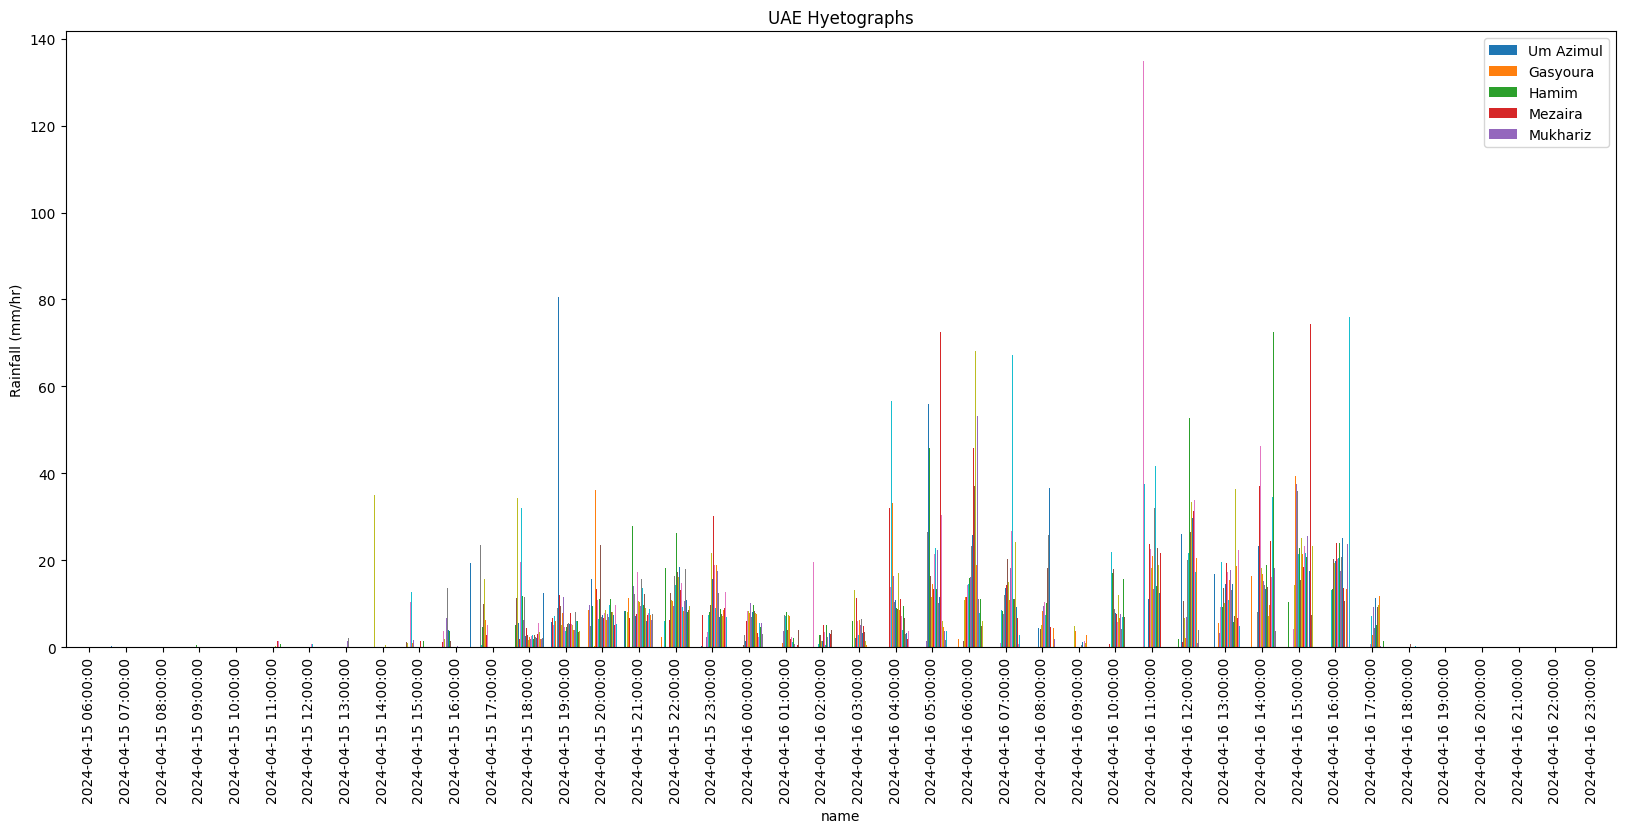

In [142]:
plt.figure()
fig, ax = plt.subplots(figsize=(20, 8))
ax.set_title('UAE Hyetographs')
ax.set_xlabel('Datetime')
ax.set_ylabel('Rainfall (mm/hr)')

start_datetime = '2024-04-15 06:00:00'
end_datetime = '2024-04-16 23:00:00'
location_names_to_plot = satelitte_df.columns

df_time_window = satelitte_df.loc[start_datetime:end_datetime]
df_time_window.plot(kind='bar', ax=ax, width=0.8)

legend_labels = satelitte_df.columns[:5]
plt.legend(legend_labels)
plt.show()


# Adjust the satellite data to match the ground-based raingauge data.

Now we have two independent data sources at each rainguage:
1. The total cumulative rainfall measured at each rainguage (sourced from the UAE NCM)
2. The estimated rainfall timeseries from the GSMaP data. This is less reliable for the volume of rainfall, but has an hourly temporal resolution. 

First we compare the ground-based volume with the satellite-based volume, and determine a calibration ratio that should be applied to the satellite time-series data to ensure it now matches the ground-based volume.

In [143]:
cumulative_satellite_rainfall = satelitte_df.sum(axis=0)
print(cumulative_satellite_rainfall)

Um Azimul           43.6881
Gasyoura            33.0349
Hamim               36.5380
Mezaira             36.8603
Mukhariz            18.6905
                     ...   
Al Khazna          129.3765
Al Arad             93.0785
Al Shuaibah        145.9971
Hafeet mountain    172.6091
Barakah 2          102.1311
Length: 81, dtype: float64


In [145]:
metadata_df = pd.read_csv('./gsmap_rainfall.csv', nrows=4)
metadata_df
print('...work in progress...')

...work in progress...
